# Real-Time Counterfactual Defense Against Adversarial Attacks in ML-Based Intrusion Detection Systems Using DiCE
This notebook involves the making of machine learning & deep learning models to classify the given data of obtained as a network intrusion into differen classes (malignant or benign). Given a sample point, the objective of machine learning model will be to classify that whether the intrusion made is  **Benign** or is a **Bot**.

# Importing Libraries
First, we will import libraries that we need to start our workflow. The libraries we are using are:
* NumPy
* Pandas
* Matplotlib
* Scikit-learn
* Keras
* TensorFlow

In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import os, re, time, math, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

We have a lot of data available to deal with in this notebook. We will perform analysis, preprocessing and modeling on one of the datasets and will conclude the results at the end. We choose the *Friday-02-03-2018_TrafficForML_CICFlowMeter.csv* dataset.

# Loading the Data
First step is to load the available data into our memory.

In [2]:
%%time
# load the data into memory
network_data = pd.read_csv('./Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')

CPU times: total: 8.39 s
Wall time: 8.67 s


# EDA (Exploratory Data Analysis)
For making a proper undertanding of dataset we are using, we will perform a bief EDA (Exploratory Data Analysis). The EDA is sub-divided into:
* Data Visuals
* Data Understanding
* Data Analysis

In [3]:
# check the shape of data
network_data.shape

(1048575, 80)

In [4]:
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s' % str((network_data.shape[1])))

Number of Rows (Samples): 1048575
Number of Columns (Features): 80


We have a total of **1 million+** samples and **80** features in data.

In [5]:
network_data.head(4)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [6]:
# check the columns in data
network_data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

The dataset is huge. We have a total of **80** columns in our data.

In [7]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

The following information tells us that:
* We have a huge amount of data, containing around **1 million** entries (samples)
* There are a total of **80** columns belonging to each sample
* There are missing values in our data, which need to be filled or dropped for proper modelling
* The memory consumption of data is about **300 MB**

In [8]:
# check the number of values for labels
network_data['Label'].value_counts()

Label
Benign    762384
Bot       286191
Name: count, dtype: int64

Most of the network intrusions in our data are benign (~76%), as output from above code cell. 

## Data Visualizations
After getting some useful information about our data, we now make visuals of our data to see how the trend in our data goes like. The visuals include bar plots, distribution plots, scatter plots, etc.

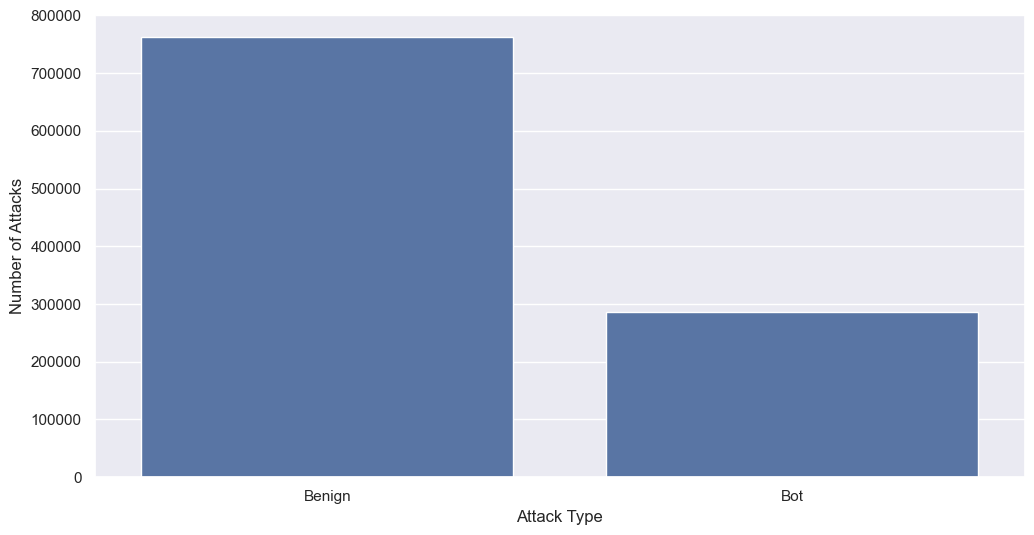

In [9]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=network_data)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

# Data Preprocessing
Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data. 

In [10]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2558,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

All features in the data have no null or missing values, except one feature that contains **2558** missing values. We need to remove this column from our data, so that our data may get cleaned.

In [11]:
# drop null or missing columns
cleaned_data = network_data.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Label Encoding
The Label feature in the data contains 2 labels as Benign and Bot. All these are in string format.

In [12]:
# encode the column labels
label_encoder = LabelEncoder()
cleaned_data['Label']= label_encoder.fit_transform(cleaned_data['Label'])
cleaned_data['Label'].unique()

C:\Users\Sharjeel\AppData\Local\Temp\ipykernel_17320\2480667849.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1])

In [13]:
# check for encoded labels
cleaned_data['Label'].value_counts()

Label
0    759826
1    286191
Name: count, dtype: int64

After removing the missing valued column in our data, we have now no feature that contains any missing or null value. Data is cleaned now.

## Shaping the data for Random Forest
For applying a convolutional neural network on our data, we will have to follow following steps:
* Seperate the data of each of the labels
* Create a numerical matrix representation of labels
* Apply resampling on data so that can make the distribution equal for all labels
* Create X (predictor) and Y (target) variables
* Split the data into train and test sets

In [14]:
# Create separate datasets
data_1 = cleaned_data[cleaned_data['Label'] == 0]
data_2 = cleaned_data[cleaned_data['Label'] == 1]

# Merge them
X = pd.concat([data_1, data_2], sort=True)

# Separate features and labels (without encoding)
y = X['Label']
X = X.drop(columns=['Label'])

In [15]:
print(X.shape)
print(y.shape)

(1046017, 79)
(1046017,)


In [16]:
# checking if there are some null values in data
X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

## Data Argumentation
To avoid biasing in data, we need to use data argumentation on it so that we can remove bias from data and make equal distributions.

In [17]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)

In [18]:
train_dataset = pd.concat([data_1_resample, data_2_resample])
train_dataset.head(2)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
565071,53,17,02/03/2018 11:28:20,322,1,1,65,193.0,65,65,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
161268,3389,6,02/03/2018 03:00:10,1915100,8,7,1144,1581.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


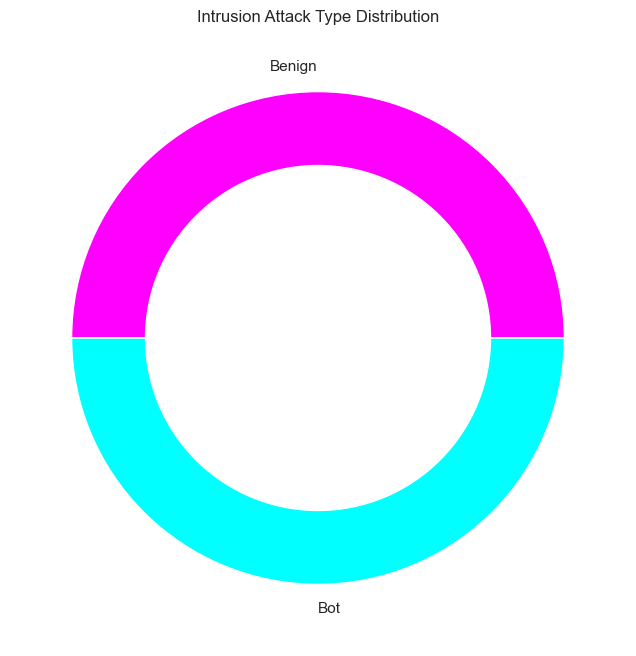

In [19]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Benign', 'Bot'], colors=['magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(circle)

## Making X & Y Variables

In [20]:
test_dataset = train_dataset.sample(frac=0.1)
y_train = train_dataset['Label']
y_test = test_dataset['Label']
y_train.unique(), y_test.unique()

(array([0, 1]), array([1, 0]))

## Data Splicing
This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of **90-10**, i.e., **90%** data to be used for training & **20%** to be used for testing purpose. We drop the irrelevant columns:

In [21]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)

print(train_dataset.shape)

(40000, 74)


In [22]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 73)
(4000, 73)
(40000,)
(4000,)


## Random Forest Training

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

rf_classifier = RandomForestClassifier(
    n_estimators=100,             
    max_depth=3,                 
    min_samples_split=2,          
    min_samples_leaf=1,         
    bootstrap=True,                          
    random_state=42,              
    n_jobs=-1               
)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
print(f"Validation R^2 Score: {r2:.2f}")
print(f"Accuracy on original test data: {accuracy_score(y_test, rf_classifier.predict(X_test)):.2f}")

Validation MSE: 0.01
Validation R^2 Score: 0.97
Accuracy on original test data: 0.99


# Conclusion after Random Forest Training
After training our Random Forest Classifier on the training data and evaluating its performance on the test set, it can be interpreted that:
* The model was trained using **100** decision trees with a maximum depth of **3** and default values for *min_samples_split* and *min_samples_leaf*.
* The Random Forest model generalized well and showed strong predictive performance.
* The Mean Squared Error (MSE) on validation data was **0.01**, indicating that the model made very few incorrect predictions.
* The model achieved an impressive *R²* Score of **0.97**, which suggests that **97%** of the variability in the data is explained by the model.
* Therefore, the Random Forest Classifier proved to be highly effective for this classification task, with reliable performance and strong generalization capability.

create adversarials using dice conterfactuals

In [ ]:
x = 10  # Specify the number of malicious samples to pick
malicious_samples = train_dataset[train_dataset['Label'] == 1].sample(n=x, random_state=42)

import dice_ml
from dice_ml.utils import helpers

# Step 1: Wrap the RandomForestClassifier for DiCE
model = dice_ml.Model(model=rf_classifier, backend="sklearn")

# Step 2: Create a DiCE data object
data = dice_ml.Data(dataframe=train_dataset, continuous_features=list(train_dataset.columns.drop(['Label'])), outcome_name="Label")

# Step 3: Initialize DiCE
dice = dice_ml.Dice(data, model)

# Step 4: Generate Counterfactuals for Malicious Samples
adversarial_samples = []
n_counterfactuals = 3  # Number of counterfactuals per sample

for i, sample in malicious_samples.iterrows():
    sample_to_explain = sample.drop("Label").to_frame().T  # Drop the label column
    counterfactuals = dice.generate_counterfactuals(
        sample_to_explain,
        total_CFs=n_counterfactuals,
        desired_class=0  # Generate counterfactuals classified as benign
    )
    cf_df = counterfactuals.cf_examples_list[0].final_cfs_df
    cf_df["Label"] = 1  # Update labels back to 1 (malicious)
    adversarial_samples.append(cf_df)

# Combine all counterfactuals into a single DataFrame
adversarial_samples_df = pd.concat(adversarial_samples, ignore_index=True)

# Step 5: Save to CSV
adversarial_samples_df.to_csv("adversarial_samples.csv", index=False)
print("Adversarial samples saved to adversarial_samples.csv")

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

Adversarial samples saved to adversarial_samples.csv


creating test sample:

mixing adversarial samples with random samples from the test dataset

In [29]:
# Define the number of adversarial and benign samples
x = 3  # Number of adversarial samples
y = 3  # Number of benign samples

# Load the adversarial samples
adversarial_samples = pd.read_csv("adversarial_samples.csv")

# Select x adversarial samples
selected_adversarial_samples = adversarial_samples.sample(n=x, random_state=42)

# Select y benign samples (Label = 0) from the test dataset
benign_samples = test_dataset[test_dataset["Label"] == 0].sample(n=y, random_state=42)

# Combine the selected adversarial and benign samples
test_samples = pd.concat([selected_adversarial_samples, benign_samples], ignore_index=True)

# Save the combined samples to a CSV file
test_samples.to_csv("test_samples.csv", index=False)

print(f"Test samples saved to test_samples.csv with {x} adversarial and {y} benign samples.")

Test samples saved to test_samples.csv with 3 adversarial and 3 benign samples.


load test samples

In [30]:
# Load the adversarial samples
test_samples = pd.read_csv("test_samples.csv")

# Separate features and labels
X_testing = test_samples.drop(columns=["Label"])  # Features
y_testing = test_samples["Label"]  # True labels

# Predict using the Random Forest classifier
y_pred = rf_classifier.predict(X_testing)

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



dice counterfactuals

In [31]:
from sklearn.metrics import euclidean_distances
import dice_ml

# Count initial predictions
initial_benign_count = sum(y_pred == 0)
initial_malicious_count = sum(y_pred == 1)
print(f"Initial Predictions: {initial_benign_count} benign, {initial_malicious_count} malicious.")

# Check if any samples are predicted as benign (0)
benign_indices = [i for i, pred in enumerate(y_pred) if pred == 0]

if len(benign_indices) == 0:
    print("No adversarial samples were predicted as benign.")
else:
    print(f"{len(benign_indices)} adversarial samples were predicted as benign.")

    # Initialize DiCE for counterfactual generation
    dice_data = dice_ml.Data(
        dataframe=adversarial_samples,
        continuous_features=list(X_testing.columns),
        outcome_name="Label"
    )
    dice_model = dice_ml.Model(model=rf_classifier, backend="sklearn")
    dice = dice_ml.Dice(dice_data, dice_model)

    # Threshold for distance to determine if a sample is adversarial
    distance_threshold = 0.5  # Adjust this based on your dataset

    # Track corrected predictions
    corrected_benign_count = 0
    corrected_malicious_count = 0

    # Loop through each benign prediction and analyze with DiCE
    for index in benign_indices:
        print(f"\nAnalyzing sample at index {index}...")

        # Extract the sample
        sample_to_explain = X_testing.iloc[index:index+1]

        try:
            # Generate counterfactuals
            counterfactuals = dice.generate_counterfactuals(
                sample_to_explain,
                total_CFs=5,  # Increase the number of counterfactuals to generate
                desired_class=1,  # Generate counterfactuals classified as malicious
                proximity_weight=0.5,  # Adjust proximity weight to relax constraints
                diversity_weight=0.5   # Adjust diversity weight to allow more variation
            )
        except Exception as e:
            print(f"Failed to generate counterfactuals for sample at index {index}: {e}")
            print("The sample is likely truly benign (small distance to cfs).")
            corrected_benign_count += 1
            continue

        # Get the counterfactuals as a DataFrame
        cf_df = counterfactuals.cf_examples_list[0].final_cfs_df.drop(columns=["Label"])

        # Compute the distance between the original sample and its counterfactuals
        distances = euclidean_distances(sample_to_explain, cf_df)
        feature_changes = (cf_df != sample_to_explain.values).sum(axis=1).mean()

        # Use distance and feature changes to decide if the sample is adversarial
        if distances.mean() < 0.5 or feature_changes < 3:
            print("The sample is possibly adversarial (large distance to cfs).")
            corrected_malicious_count += 1
        else:
            print("The sample is likely truly benign (small distance to cfs).")
            corrected_benign_count += 1

    # Final counts after DiCE analysis
    print("\nFinal Results After DiCE Analysis:")
    print(f"Corrected Predictions: {corrected_benign_count} benign, {corrected_malicious_count} malicious.")

    # Compare initial and corrected predictions
    print("\nComparison of Initial and Corrected Predictions:")
    print(f"Initially Predicted Benign: {initial_benign_count}")
    print(f"Corrected Benign: {corrected_benign_count}")
    print(f"Initially Predicted Malicious: {initial_malicious_count}")
    print(f"Corrected Malicious: {corrected_malicious_count}")

Initial Predictions: 6 benign, 0 malicious.
6 adversarial samples were predicted as benign.

Analyzing sample at index 0...


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

The sample is possibly adversarial (large distance to cfs).

Analyzing sample at index 1...


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 03 sec
Failed to generate counterfactuals for sample at index 1: No counterfactuals found for any of the query points! Kindly check your configuration.
The sample is likely truly benign (small distance to cfs).

Analyzing sample at index 2...


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

The sample is possibly adversarial (large distance to cfs).

Analyzing sample at index 3...


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 03 sec
Failed to generate counterfactuals for sample at index 3: No counterfactuals found for any of the query points! Kindly check your configuration.
The sample is likely truly benign (small distance to cfs).

Analyzing sample at index 4...


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 03 sec
Failed to generate counterfactuals for sample at index 4: No counterfactuals found for any of the query points! Kindly check your configuration.
The sample is likely truly benign (small distance to cfs).

Analyzing sample at index 5...


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 05 sec
Failed to generate counterfactuals for sample at index 5: No counterfactuals found for any of the query points! Kindly check your configuration.
The sample is likely truly benign (small distance to cfs).

Final Results After DiCE Analysis:
Corrected Predictions: 4 benign, 2 malicious.

Comparison of Initial and Corrected Predictions:
Initially Predicted Benign: 6
Corrected Benign: 4
Initially Predicted Malicious: 0
Corrected Malicious: 2
